In [22]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
import seaborn as sns
#read csv
data = pd.read_csv('Car details v3.csv')


In [23]:
data.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [24]:
data.drop(['torque'],axis=1,inplace=True)
#drop mileage column
data.drop(['mileage'],axis=1,inplace=True)
#remove null values
data.dropna(inplace=True)
data.isnull().sum()
#fill all empty values with 0
data.fillna(0,inplace=True)
#drop duplicate values
data.drop_duplicates(inplace=True)


In [25]:
data.head()



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,88.2 bhp,5.0


In [26]:
#convert data to use with neural network
data['name'] = data['name'].astype('category')
data['fuel'] = data['fuel'].astype('category')
data['seller_type'] = data['seller_type'].astype('category')
#convert to float   
data['year'] = data['year'].astype('float')
data['selling_price'] = data['selling_price'].astype('float')
data['km_driven'] = data['km_driven'].astype('float')
#make all strings numeric\
data['name'] = data['name'].cat.codes
data['fuel'] = data['fuel'].cat.codes
data['seller_type'] = data['seller_type'].cat.codes
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Convert the 'transmission' and 'owner' columns to binary
data['transmission'] = le.fit_transform(data['transmission'])
data['owner'] = le.fit_transform(data['owner'])
#remove CC in engine column and convert to float
data['engine'] = data['engine'].str.replace(' CC','')
data['engine'] = data['engine'].astype('float')
#remove bhp in max_power and remove blank space
data['max_power'] = data['max_power'].str.replace('bhp','')
data['max_power'] = data['max_power'].str.replace(' ','')
# Replace empty strings with NaN
data['max_power'].replace('', np.nan, inplace=True)
# Fill NaN with median
data['max_power'].fillna(data['max_power'].median(), inplace=True)
# Convert to float
data['max_power'] = data['max_power'].astype(float)
#convert all data to float
data = data.astype('float')














In [27]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,1250.0,2014.0,450000.0,145500.0,1.0,1.0,1.0,0.0,1248.0,74.00,5.0
1,1547.0,2014.0,370000.0,120000.0,1.0,1.0,1.0,2.0,1498.0,103.52,5.0
2,375.0,2006.0,158000.0,140000.0,3.0,1.0,1.0,4.0,1497.0,78.00,5.0
3,743.0,2010.0,225000.0,127000.0,1.0,1.0,1.0,0.0,1396.0,90.00,5.0
4,1291.0,2007.0,130000.0,120000.0,3.0,1.0,1.0,0.0,1298.0,88.20,5.0


/Users/raphaelkoop/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([5374])) that is different to the input size (torch.Size([5374, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:  1  loss: 740630.31250000
epoch: 11  loss: 740630.12500000
epoch: 21  loss: 740629.68750000
epoch: 31  loss: 740628.87500000
epoch: 41  loss: 740627.37500000
epoch: 51  loss: 740624.25000000
epoch: 61  loss: 740618.37500000
epoch: 71  loss: 740608.00000000
epoch: 81  loss: 740590.87500000
epoch: 91  loss: 740565.00000000


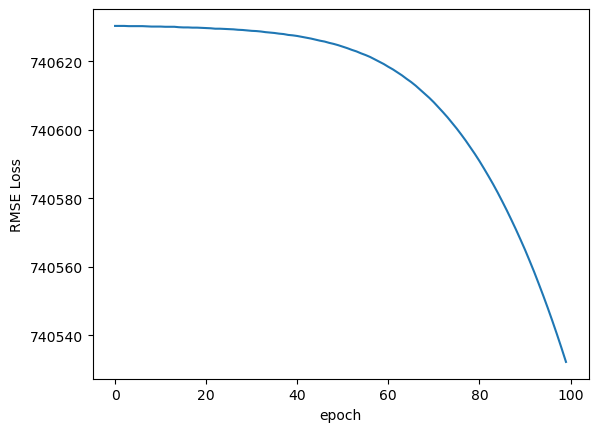

RMSE: 749025.18750000


/Users/raphaelkoop/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1344])) that is different to the input size (torch.Size([1344, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


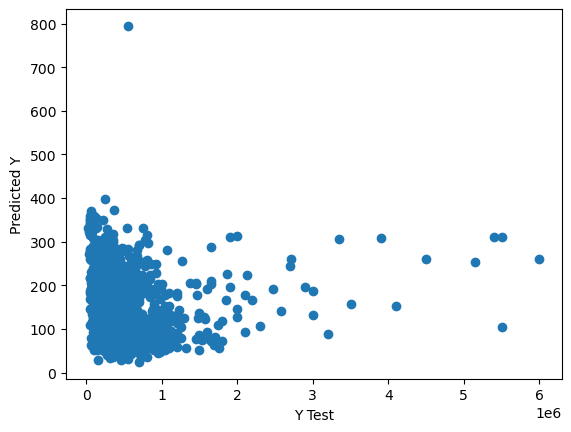

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x8 and 10x6)

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset

# Split data into train and test
X = data.drop(['selling_price'], axis=1)
y = data['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Convert to tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train.values)
y_test = torch.FloatTensor(y_test.values)

class ANN(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(in_features=input_size, out_features=6)
        self.fc2 = nn.Linear(in_features=6, out_features=4)
        self.output = nn.Linear(in_features=4, out_features=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x

# Instantiate the model with the correct input size
model = ANN(input_size=X_train.shape[1])  # Make sure input_size matches the number of features

# Train neural network
torch.manual_seed(42)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 100
losses = []

for i in range(epochs):
    i += 1
    y_pred = model.forward(X_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss.item())  # Extract the scalar value from the tensor
    if i % 10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot loss
plt.plot(range(epochs), losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')
plt.show()

# Test neural network
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = torch.sqrt(criterion(y_eval, y_test))
print(f'RMSE: {loss:.8f}')

# Plot predicted vs actual
plt.scatter(y_test, y_eval.detach().numpy())  # Use detach() to remove gradient information
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Save model
torch.save(model.state_dict(), 'car_model.pt')

# Load model
new_model = ANN(input_size=X_train.shape[1])
new_model.load_state_dict(torch.load('car_model.pt'))
new_model.eval()

# Predict new data
new_data = torch.tensor([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
with torch.no_grad():
    print(new_model(new_data).detach().numpy())
